# Image classification - Load model
Tập dữ liệu ImageNet
Gồm 1000 class, 1.200.000 ảnh train, 50.000 ảnh valid, 100.000 ảnh test \
VGG-16 (Visual Geometry Group), model gồm 16 lớp. Ngoài ra còn có các version vgg-11, 13, 19

In [22]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [23]:
# Kiểm tra phiên bản của thư viện
print("Pytorch version:", torch.__version__)

Pytorch version: 1.12.1+cu102


In [24]:
use_pretrained = True

net = models.vgg16(pretrained=use_pretrained)
# Mô hình trạng thái evaluation
net.eval()
print(net)

/home/hoang/anaconda3/envs/deep_papers/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/hoang/anaconda3/envs/deep_papers/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [25]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            # Cắt ở chính giữa
            transforms.CenterCrop(resize),
            # Chuyển về dạng tensor
            transforms.ToTensor(),
            # Normalize về tiêu chuẩn
            transforms.Normalize(mean, std)
            
        ])
    
    # Call để truyền tham số trực tiếp vào tên class mà không cần gọi hàm
    def __call__(self, img):
        return self.base_transform(img)
        

### Mean and std
The mean and std of ImageNet are: mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. If the image is not similar to ImageNet, like medical images, then it is always advised to calculate the mean and std of the dataset and use them to normalize the images.

### Chú ý :Ảnh đọc từ pillow và pytorch thứ tự sẽ bị khác nhau

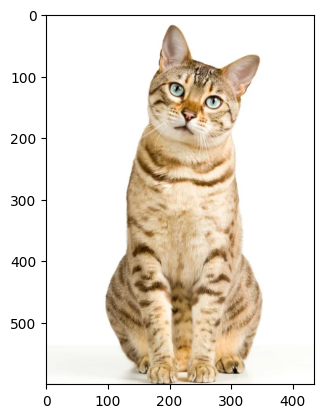

(224, 224, 3)


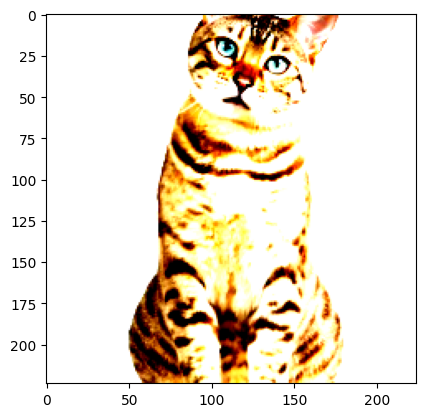

In [28]:
image_file_path = "./data/cat.jpg"

img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

# Thực hiện transform input 
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)


# Đổi chiều (channel, heigh, width) -> (heigh, width, channels)
# clip (0, 1). Giá trị trong ảnh phải nằm giữa 0 và 1

img_transformed = img_transformed.numpy().transpose(1, 2, 0)
img_transformed = np.clip(img_transformed, 0, 1)
print(img_transformed.shape)

plt.imshow(img_transformed)

## Data Flow

Image -> Base Transformed -> transformed image -> VGG 16 -> predictor -> label

In [16]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index

    def predict_max(self, out):
        max_id = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(max_id)]

        return predicted_label_name


In [6]:
!ls

data  tutorial_2.ipynb	Tutorial_3.ipynb  Tutorial_4.ipynb  Tutorial_5.ipynb


In [9]:
class_index = json.load(open('./data/imagenet_class_index.json', 'r'))

In [17]:
predictor = Predictor(class_index)


In [13]:
img_transformed = img_transformed.unsqueeze_(0)
img_transformed.shape

torch.Size([1, 3, 224, 224])

In [ ]:
out = net(img_transformed)
print(out)
result = predictor.predict_max(out)

In [21]:
print(out.shape)

torch.Size([1, 1000])


In [19]:
print(result)

['n02124075', 'Egyptian_cat']
